# Projektna naloga
## Onesnaženost zraka v Sloveniji

In [77]:
from pandas.compat import StringIO
import numpy as np
import pandas as pd
    
np.set_printoptions(suppress=True)

dataframe = pd.read_csv('podatki/pm10_2019.csv', encoding='utf-8')

In [87]:
data = dataframe.values
copy = data
copy[:, 0] = pd.to_datetime(copy[:, 0], format='%d.%m.%Y').strftime('%m-%Y')

In [79]:
months, counts = np.unique(copy[:, 0], return_counts = True)

In [90]:
# počistimo prazne celice
means = []
for month in months:
    pm10 = data[data[:, 0] == month, 1:20]
    pm10 = pm10[pm10[:, :] != '-'].astype('float') 
    month_mean = np.mean(pm10)
    means.append(month_mean)
    
means = np.column_stack((months, means))
means

array(['01-2019', 33.115315315315314], dtype=object)

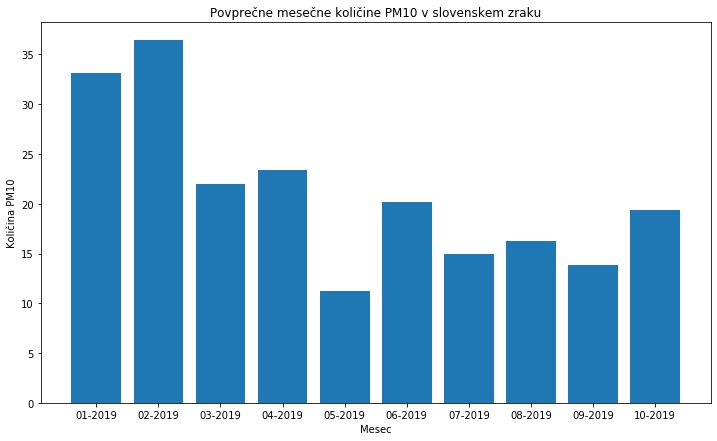

In [100]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.bar(means[:, 0], means[:, 1])
x = plt.xlabel('Mesec')
x = plt.ylabel('Količina PM10')
x = plt.title('Povprečne mesečne količine PM10 v slovenskem zraku')
plt.show()